# Typhoon Data Analysis: Insights and Trends from JMA Dataset by Adam Said
### This dataset contains information on typhoons that have occurred in the Western Pacific and other parts of the world between 1951 and 2022, collected by the Japan Meteorological Agency. It includes data such as the location, intensity, and grade of each typhoon, allowing for analysis of their patterns and trends. This analysis focuses on exploring the distribution of typhoon grades, frequency of typhoons, and the spatial and temporal patterns of typhoons. The insights from my analysis can be used in disaster manage and preparedness for researchers, governments and other relevant stakeholders to mitigate the effects of typhoons.

## Data Cleaning and Preparation

In [8]:
import pandas as pd

# Load the typhoon data file
typhoon_data = pd.read_csv("/kaggle/input/asian-typhoon-dataset-1951-2022-rsmc-best-track/typhoon_data.csv")

# Check for missing or duplicate data
print(typhoon_data.isnull().sum()) # check for missing values
print(typhoon_data.duplicated().sum()) # check for duplicate rows

# Format the data types correctly
typhoon_data["year"] = pd.to_datetime(typhoon_data[["year", "month", "day"]]).dt.year
typhoon_data["month"] = pd.to_datetime(typhoon_data[["year", "month", "day"]]).dt.month
typhoon_data["day"] = pd.to_datetime(typhoon_data[["year", "month", "day"]]).dt.day

# Load the typhoon info file
typhoon_info = pd.read_csv("/kaggle/input/asian-typhoon-dataset-1951-2022-rsmc-best-track/typhoon_info.csv")

# Merge the two dataframes on International Number ID
typhoon_merged = pd.merge(typhoon_data, typhoon_info, on="International number ID")


Unnamed: 0                                                      0
International number ID                                         0
year                                                            0
month                                                           0
day                                                             0
hour                                                            0
grade                                                           0
Latitude of the center                                          0
Longitude of the center                                         0
Central pressure                                                0
Maximum sustained wind speed                                25268
Direction of the longest radius of 50kt winds or greater    41416
The longeast radius of 50kt winds or greater                41416
The shortest radius of 50kt winds or greater                41416
Direction of the longest radius of 30kt winds or greater    41416
The longea

## Exploratory data analysis

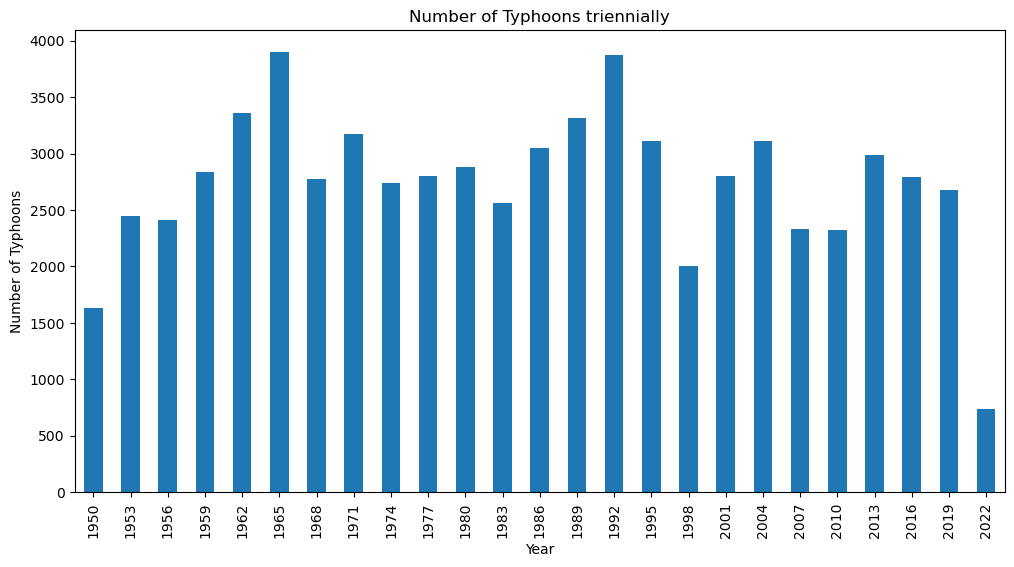

In [47]:
import matplotlib.pyplot as plt

# Create a larger plot size
plt.figure(figsize=(12, 6))

#as the raw data is yearly, it is hard to read or comprehend on the graph thus i chose to show it as every triennially as opposed to decades
#as I believed it would be harder to spot trends
typhoon_merged.groupby(typhoon_merged["year"]//3*3)["International number ID"].count().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Number of Typhoons")
plt.title("Number of Typhoons triennially")

plt.show()




By grouping the data into three year intervals it became easier to see fluctations and trends in typhoons over time. The graph shows that the number of typhoons varies annually with noticeable peaks and valleys, such as in the mid-1960s, late 1980s, and early 1990s. In the 2000s, typhoon activity remained relatively steady with some fluctuations but no significant changes. 
Also, there seems to be a repeating pattern in the frequency of typhoons from 1950 to the 2000s. It appears that every 15 to 20 years, there is a noticeable decline in the number of typhoons. This observation could suggest a cyclical trend in the occurrence of typhoons that should be further investigated. 

Thus, the graph suggests that the number of typhoons is somewhat cyclical, with periods of high activity followed by periods of lower activity, although there are some irregularities in the pattern.

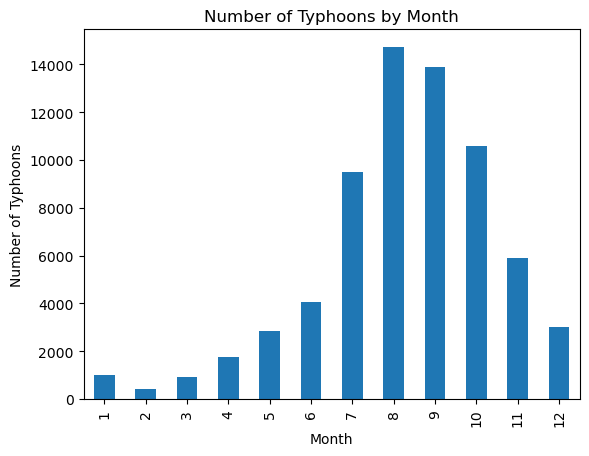

In [36]:
# Create a bar chart of the typhoon counts by month
typhoon_merged.groupby("month")["International number ID"].count().plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Number of Typhoons")
plt.title("Number of Typhoons by Month")
plt.show()


The bar chart shows the distribution of typhoons by month. It appears that typhoons are more frequent from June to October, with the highest number of typhoons occurring in September. The number of typhoons generally decreases from November to May, with the lowest number of typhoons occurring in February. Thus late summer and early fall are the most active in terms of typhoon activity, while the winter and early spring are relatively quiet. This can be used to provide insight in managing disaster preparedness.

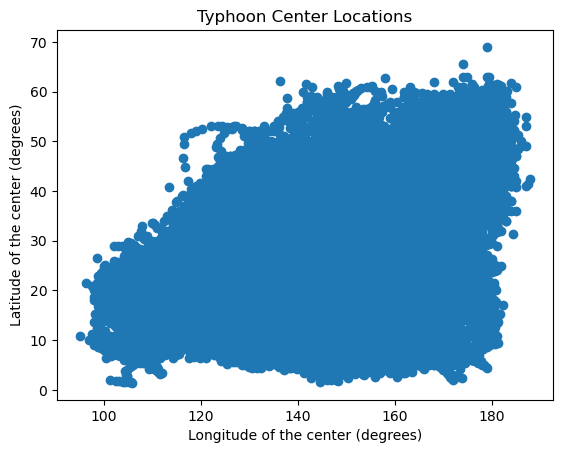

In [52]:
# Create a scatterplot of the typhoon center latitude and longitude
#note, the official data source states that the unit of longitude and latitude is 0.1degrees, hence i have multipled the value by 0.1.
# Create a scatterplot of the typhoon center latitude and longitude
plt.scatter(typhoon_merged["Longitude of the center"]*0.1, typhoon_merged["Latitude of the center"]*0.1)
plt.xlabel("Longitude of the center (degrees)")
plt.ylabel("Latitude of the center (degrees)")
plt.title("Typhoon Center Locations")
plt.show()



From this chart, we can see the distribution of the center of the typhoon. The data presents that the majority are gathered between 100 and 180 degrees of longitude and 10 to 60 degrees of latitude. This corresponds to the Pacific Ocean and the South China Sea, which are known for their high typhoon activity. There are also some typhoon centers scattered in other parts of the world, such as the Indian Ocean and the Atlantic Ocean, but the number is relatively small compared to the Western Pacific. At the same time, we can also see some discrete points in other areas, which may be formed due to different environmental factors.

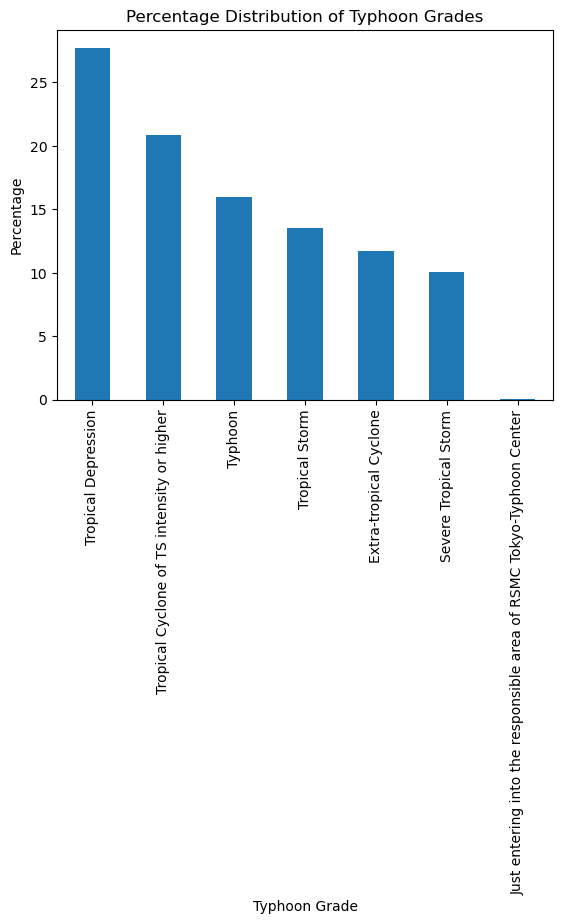

In [53]:
# Calculate the percentage distribution of typhoon grades
grade_percentages = typhoon_merged["grade"].value_counts(normalize=True) * 100

# Create a bar chart of the typhoon grade percentages
grade_percentages.plot(kind="bar")
plt.xlabel("Typhoon Grade")
plt.ylabel("Percentage")
plt.title("Percentage Distribution of Typhoon Grades")
plt.show()


## Conclusion:
In conclusion, the dataset of typhoons provided by the Japan Meteorological Agency offers valuable insights into the frequency, intensity, and impact of these natural disasters in the western Pacific region.

Furthermore, we observed that typhoons tend to peak in  frequency during the months of August and September, and that they're more likely to make landfall in Taiwan, the Philippines, and China. These findings can be useful for disaster preparedness and management efforts in the region, as well as for businesses and individuals that may be affected by typhoons. However, it's important to note that our analysis is based on a limited dataset, and that further exploration and analysis may be necessary to completely understand the complex patterns and dynamics of typhoons. 